In [2]:
import pandas as pd
import numpy as np
from numpy import random as rd
import string

In [3]:
rd.seed(0)
rd.rand(1,10)

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
        0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152]])

Geração de amostra com 4 atributos e 3 ocorrencias

In [5]:
rd.seed(1)
atributos={'A','B','C','D','E','F','G','H'}
rd.randint(2, size=(3, 8))


array([[1, 1, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 0]])

In [6]:
df = pd.DataFrame(rd.randint(5, size=(30000, 8)), columns=atributos)

In [221]:
df.head()

,G,H,C,A,B,F,E,D
0,1,1,3,0,1,4,4,2
1,0,2,3,2,2,4,2,1
2,2,0,3,2,1,0,2,1
3,3,2,3,3,3,0,2,4
4,1,0,1,3,4,3,2,3


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

from matplotlib import pyplot as plt
%matplotlib inline


In [8]:
df.A = scale(df.A)
df.B = scale(df.B)
df.C = scale(df.C)
df.D = scale(df.D)
df.E = scale(df.E)
df.F = scale(df.F)
df.G = scale(df.G)
df.H = scale(df.H)

/home/andre/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/andre/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/andre/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/andre/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/andre/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversio

In [9]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['A','H']])
y_predicted

array([2, 2, 2, ..., 2, 2, 3], dtype=int32)

In [11]:
df['cluster']=y_predicted

In [14]:
df_grupo_1 = df.loc[df['cluster']==0]
df_grupo_2 = df.loc[df['cluster']==1]
df_grupo_3 = df.loc[df['cluster']==2]
df_grupo_4 = df.loc[df['cluster']==3]

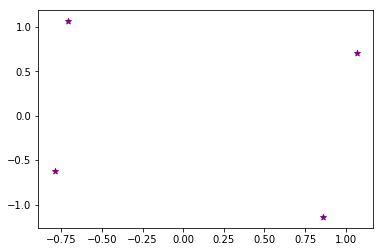

In [15]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

In [232]:
df.head()

,G,H,C,A,B,F,E,D,cluster
0,-0.711648,-0.716696,0.710327,-1.412964,-0.699540,1.412790,1.414866,0.006610,1
1,-1.420509,-0.006252,0.710327,-0.004811,0.007066,1.412790,-0.001393,-0.701576,2
2,-0.002788,-1.427139,0.710327,-0.004811,-0.699540,-1.412460,-0.001393,-0.701576,2
3,0.706072,-0.006252,0.710327,0.699265,0.713673,-1.412460,-0.001393,1.422980,2
4,-0.711648,-1.427139,-0.702696,0.699265,1.420279,0.706477,-0.001393,0.714795,2


In [233]:
km.cluster_centers_

array([[ 1.12950855,  0.84368116],
       [-1.06852231, -0.70453021],
       [ 0.60970645, -0.80088595],
       [-0.7074107 ,  1.05429729]])

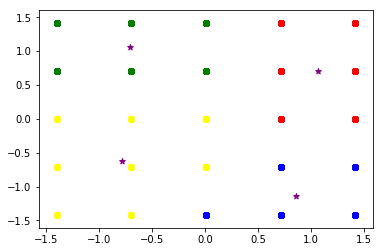

In [16]:
plt.scatter(df_grupo_1.A,df_grupo_1.H,color='green')
plt.scatter(df_grupo_2.A,df_grupo_2.H,color='blue')
plt.scatter(df_grupo_3.A,df_grupo_3.H,color='yellow')
plt.scatter(df_grupo_4.A,df_grupo_4.H,color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

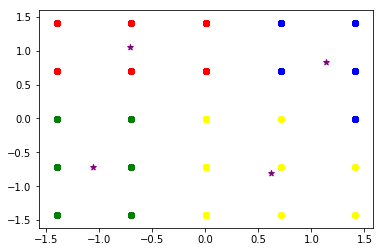

In [17]:
km = KMeans(n_clusters=4)

df['cluster']=km.fit_predict(df[['A','B']])

df_grupo_1 = df.loc[df['cluster']==0]
df_grupo_2 = df.loc[df['cluster']==1]
df_grupo_3 = df.loc[df['cluster']==2]
df_grupo_4 = df.loc[df['cluster']==3]

plt.scatter(df_grupo_1.A,df_grupo_1.B,color='green')
plt.scatter(df_grupo_2.A,df_grupo_2.B,color='blue')
plt.scatter(df_grupo_3.A,df_grupo_3.B,color='yellow')
plt.scatter(df_grupo_4.A,df_grupo_4.B,color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')